In [2]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=[0,600], y=[0,800],mode='none'))

fig.update_xaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)

fig.update_yaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)

fig.add_shape(type="circle",
    line_color="white", fillcolor="green",
    x0=0, y0=0, x1=600, y1=800
)
fig.add_shape(type="circle",
    line_color="white", fillcolor="green",
    x0=150, y0=150, x1=450, y1=650
)
fig.add_shape(type="rect",
    line_color="white", fillcolor="green",
    x0=275, y0=275, x1=320, y1=525
)

fig.add_shape(type="line",
    line_color="white", fillcolor="green",
    x0=275, y0=500, x1=320, y1=500
)

fig.add_shape(type="line",
    line_color="white", fillcolor="green",
    x0=275, y0=300, x1=320, y1=300
)

fig.add_shape(type="rect",
    line_color="white", fillcolor="rgba(128, 0, 0,0.6)",
    x0=290, y0=275, x1=305, y1=525
)



fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    margin=dict(
        l=100,
        r=100,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
    plot_bgcolor= 'rgba(0,0,0,0)'
)
fig.show()

/tmp/ipykernel_153697/3443962070.py:44: MatplotlibDeprecationWarning:

Passing argument *p* of unexpected type Line2D to add_patch which only accepts <class 'matplotlib.patches.Patch'> is deprecated since 3.5 and will become an error two minor releases later.



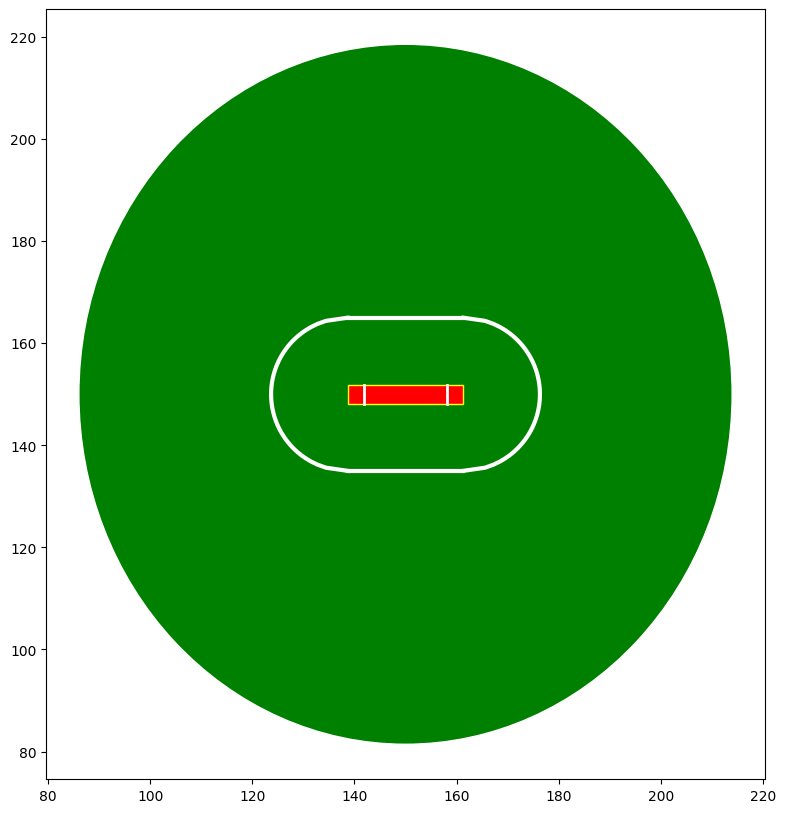

<AxesSubplot:>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.patches import Wedge
from matplotlib.patches import Rectangle
import numpy as np

plt.rcParams['figure.figsize'] = [10, 10]
spadl1_config = {
    "height": 3.66,
    "width": 22.56,
    "origin_x": 0,
    "origin_y": 0,
    "crease":3.15
}
d1 = 128
d2 = 137.16
#d1 = 118.86
#d2 = 128
gmin_config = {
    "length": d1,
    "height": d2,
    "origin_x": 0,
    "origin_y": 0,
    "max":150,
    "infield":15
}

gmax_config = {
    "length": 82.29,
    "width": 64,
    "origin_x": 0,
    "origin_y": 0,
    "max":150
}

def _plt_rect(ax,xy,w,h,fc,ec):
    rectangle = plt.Rectangle(xy=xy, width=w,height=h, fc=fc,ec=ec)
    ax.add_patch(rectangle)
    
def _plt_line(ax,x,y,lw,color):
    line = plt.Line2D(xdata=x, ydata=y,lw=lw, color=color)
    ax.add_patch(line)

def _plt_circle(ax,xy,r,fc,ec):
    circle = plt.Circle(xy=xy,radius=r, fc='green',ec="white")
    ax.add_patch(circle)
    
def _plt_ellipse(ax,xy,w,h,fc,ec):
    ellipse = Ellipse(xy=xy, width=w, height=h,edgecolor=ec, fc=fc)
    ax.add_patch(ellipse)

def _plt_wedge(ax,xy,r,theta1, theta2,fc,ec):
    w1 = Wedge(xy=xy, radius=r, theta1=theta1, theta2=theta2, fc=fc, edgecolor=dc)
    ax.add_patch(w1)
    
def _plit_inside(ax,r,fmax,fc,ec,pitch_config=spadl1_config):  
    cfg = pitch_config   
    a = r
    b = r
    x0 = fmax 
    y0 = fmax + r -  (cfg['height'])
    # ((x - x0) / a) ** 2 + ((y - y0) / b) ** 2 == 1
    x = np.linspace(-a + x0, a + x0)
    y = b * np.sqrt(1 - ((x - x0) / a) ** 2) + y0
    ax.plot(y, x,linewidth=3,color='white')
    ax.plot([(fmax - (cfg['width']/2)),(fmax+(cfg['width']/2))],[(fmax+r),(fmax+r)],'',linewidth=3,color='white')
    ax.plot([(fmax - (cfg['width']/2)),(fmax+(cfg['width']/2))],[(fmax-r),(fmax-r)],'',linewidth=3,color='white')
    x0 = fmax
    y0 = fmax - r +  (cfg['height'])
    x = np.linspace(-a + x0, a + x0)
    y = -b * np.sqrt(1 - ((x - x0) / a) ** 2) + y0
    ax.plot(y, x,linewidth=3,color='white')
    
def pitch1(
    ax,
    fmax,
    linecolor="green",
    fieldcolor=None,
    alpha=1,
    figsize=None,
    pitch_config=spadl1_config,
    show=True,
):
    cfg = pitch_config    
    #pitch rectangle
    _plt_rect(ax=ax,xy=((fmax-(cfg['width']/2)),(fmax-(cfg['height']/2))),w=cfg['width'],h=cfg['height'],fc='red',ec="yellow")
    _plt_line(ax=ax,x=((fmax+cfg['crease']-(cfg['width']/2)), (fmax+cfg['crease']-(cfg['width']/2))),y=((fmax + (cfg['height']/2)),(fmax - (cfg['height']/2))),lw=2,color="white")

    _plt_line(ax=ax,x=((fmax-cfg['crease']+(cfg['width']/2)), (fmax-cfg['crease']+(cfg['width']/2))),y=((fmax + (cfg['height']/2)),(fmax - (cfg['height']/2))),lw=2,color="white")
    
def ground(
    ax=None,
    linecolor="green",
    fieldcolor=None,
    alpha=1,
    figsize=None,
    ground_config=gmin_config,
    pitch_config=spadl1_config,
    show=True,
):
    cfg = ground_config
    pfg= pitch_config
    
    # Create figure
    if ax is None:
        plt.rcParams['figure.figsize'] = [10, 10]
        plt.axes()
        ax = plt.gca()
        
    _plt_ellipse(ax=ax,xy=(cfg['max'],cfg['max']),w=cfg['length'],h=cfg['height'],fc='green',ec="white")
    _plit_inside(ax=ax,r=cfg['infield'],fmax=cfg['max'],fc='green',ec="white")
    pitch1(ax=ax,fmax=cfg['max'])
    if show:
        plt.axis('scaled')
        plt.show()
        
    return ax

ground(show=True)

In [12]:
def plot_legend_shots(df,total):    
    plt.rcParams['figure.figsize'] = [5, 5]
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4, 1.1))
    ax1,ax2 = axes
    rectangles = {'1s' : mpatch.Rectangle((0.2,0.05), 0.7, 0.7,fc=colors_matrix[1]),
                  '2s' : mpatch.Rectangle((1.2,0.05), 0.7, 0.7,fc=colors_matrix[2]),
                  '3s' : mpatch.Rectangle((2.2,0.05), 0.7, 0.7,fc=colors_matrix[3]),
                  '4s' : mpatch.Rectangle((3.2,0.05), 0.7, 0.7,fc=colors_matrix[4]),
                  '5s' : mpatch.Rectangle((4.2,0.05), 0.7, 0.7,fc=colors_matrix[5]),
                  '6s' : mpatch.Rectangle((5.2,0.05), 0.7, 0.7,fc=colors_matrix[6]),
                  'Runs' : mpatch.Rectangle((6.2,0.1), 1.2, 0.8)}
    ax1.add_artist(mpatch.Rectangle((0,0), 8,8,fc='#E1E1E1'))
    for r in rectangles:
        ax1.add_artist(rectangles[r])
        rx, ry = rectangles[r].get_xy()
        cx = rx + rectangles[r].get_width()/2.0
        cy = ry + rectangles[r].get_height()/2.0

        ax1.annotate(r, (cx, cy), color='w', weight='bold', 
                    fontsize=10, ha='center', va='center')

    ax1.set_xlim((0, 10))
    ax1.set_ylim((0, 0.8))
    ax2.set_xlim((0, 10))
    ax2.set_ylim((0, 0.8))

    rectangles = { df.runs[0] : mpatch.Rectangle((0.2,0.05), 0.7, 0.7,fc='#FFFFFF'),
                   df.runs[1] : mpatch.Rectangle((1.2,0.05),0.7, 0.7,fc='#FFFFFF'),
                   df.runs[2] : mpatch.Rectangle((2.2,0.05), 0.7, 0.7,fc='#FFFFFF'),
                   df.runs[3] : mpatch.Rectangle((3.2,0.05), 0.7, 0.7,fc='#FFFFFF'),
                   df.runs[4] : mpatch.Rectangle((4.2,0.05), 0.7, 0.7,fc='#FFFFFF'),
                   df.runs[5] : mpatch.Rectangle((5.2,0.05), 0.7, 0.7,fc='#FFFFFF'),
                   total : mpatch.Rectangle((6.2,0.05), 0.7, 0.7,fc='#FFFFFF')}
    for r in rectangles:
        ax2.add_artist(rectangles[r])
        rx, ry = rectangles[r].get_xy()
        cx = rx + rectangles[r].get_width()/2.0
        cy = ry + rectangles[r].get_height()/2.0

        ax2.annotate(r, (cx, cy), color='black', weight='bold', 
                    fontsize=10, ha='center', va='center')
    plt.rcParams['figure.figsize'] = [5, 5]
    ax1.set_facecolor('#E1E1E1')
    ax1.set_aspect('equal')
    ax2.set_facecolor('#FFFFFF')
    ax2.set_aspect('equal')
    ax1.set_axis_off()
    ax1.set_facecolor('#E1E1E1')
    ax2.set_axis_off()
    plt.show()

In [15]:
df=pd.read_csv("batsman_scores.csv")
df1=pd.DataFrame({'scores':[1,2,3,4,5,6],'runs':[0,0,0,0,0,0]})
df1.loc[df1.scores.isin(df.runs.value_counts().keys().to_list()),'runs'] = list(df.runs.value_counts().values)
df1['total']= df1.runs * df1.scores
total = df1.total.sum()

In [18]:
x0 = df.x0
y0 = df.y0
_x = [x]*df.shape[0]
_y=  [y]*df.shape[0]
xc = np.c_[_x,x0]
yc  = np.c_[_y,y0]
fxy=list(zip(xc, yc,df.runs))

In [20]:
x = gmin_config['max']  - (spadl1_config['width']/2) + 3.15
y = gmin_config['max'] 
colors_matrix = {1:'yellow',2:'#FF00FF',3:'#008080',4:'#0000FF',5:'#000080',6:'#00FF00'}

/tmp/ipykernel_153697/3443962070.py:44: MatplotlibDeprecationWarning:

Passing argument *p* of unexpected type Line2D to add_patch which only accepts <class 'matplotlib.patches.Patch'> is deprecated since 3.5 and will become an error two minor releases later.

/tmp/ipykernel_153697/1427061998.py:23: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.



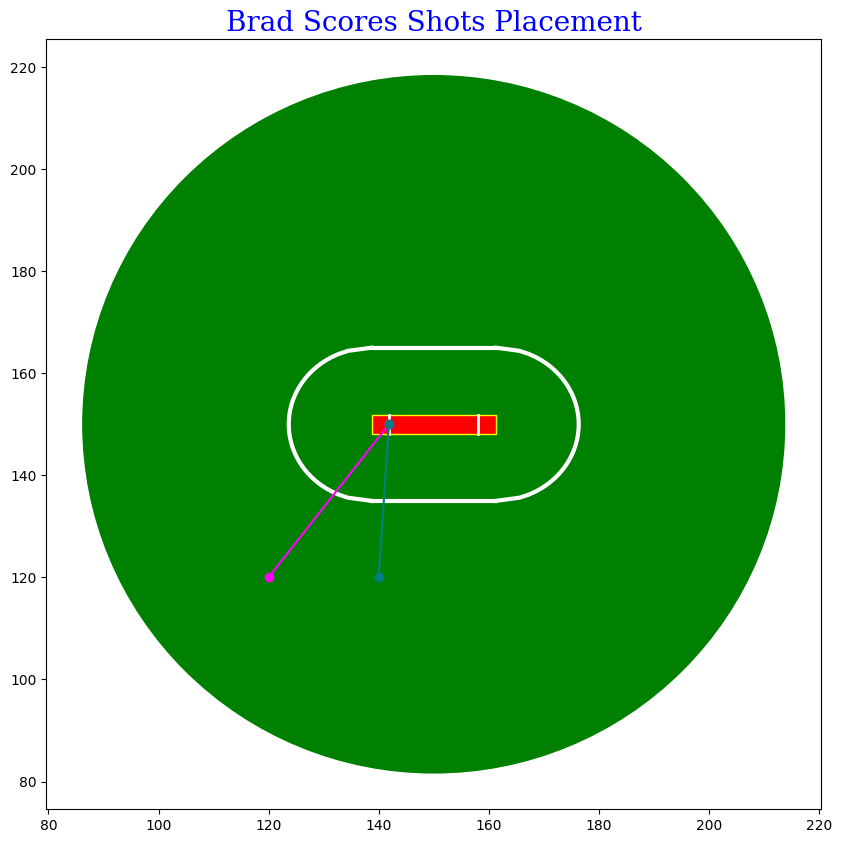

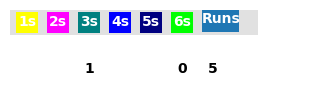

In [10]:
import matplotlib.patches as mpatch
ax=ground(show=False)
plt.rcParams['figure.figsize'] = [10, 10]


#fxy = np.c_[xc,yc]
for cord in fxy:
    ax.plot(cord[0], cord[1], 'go-',color=colors_matrix[cord[2]])
font1 = {'family':'serif','color':'blue','size':20}
plt.title("Brad Scores Shots Placement", fontdict = font1)
plt.show()
plot_legend_shots(df1,total)
